# Police Data Analysis: Identifying Trends and Disparities

# Import Libraries

In [2]:
import pandas as pd

# Load and Read the dataset

In [3]:
data = pd.read_csv('/kaggle/input/police-dataset/Police Dataset.csv')
data

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,NaN,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,NaN,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,NaN,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


# Data Cleaning

# 1. Let's Remove the Column That Only Contains Missing Values

In [ ]:
# df.isnull().sum()

# df.drop(columns = 'column_name', inplace=True)

In [7]:
data.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [ ]:
data.drop(columns = 'country_name', inplace =True)

In [9]:
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


# Filtering Data and Value Counts

# 2. Who was stopped more often? Men or Women?

In [10]:
# df[df.column1 == 'element/value'].column_2.value_counts()

In [11]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [12]:
data[data.violation == 'Speeding'].driver_gender.value_counts()

# data[data.violation] == 'Speeding'] - filtering 'speeding' from Violation column
# we've to work on 2nd column, driver_gender
# value_counts() - to see all unique values in a column with counts

driver_gender
M    25517
F    11686
Name: count, dtype: int64

# Groupby for Data Aggregation

# 3. Does gender impact who gets searched during a stop?

In [13]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
data.groupby('driver_gender').search_conducted.sum()

# groupby - used to make a group of each unique values present in a column

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [ ]:
# df.groupby('column1').column2.sum()

In [ ]:
# How many times search was conducted ?

In [15]:
data.search_conducted.value_counts()

search_conducted
False    63056
True      2479
Name: count, dtype: int64

# Data Visualization and Insights

# Barchart Showing Gender Distribution of Traffic Stops


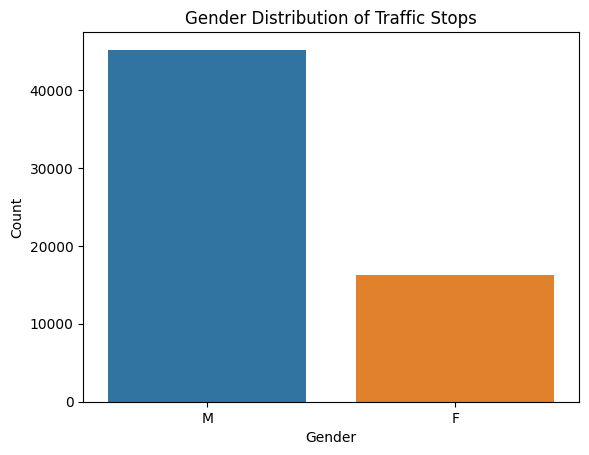

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of gender distribution
sns.countplot(x='driver_gender', data=data)
plt.title('Gender Distribution of Traffic Stops')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

It's evident that there's a significant disparity in the number of traffic stops between male and female drivers.

Male Dominance: The chart clearly shows that a significantly larger number of traffic stops involve male drivers.

# Histogram of Driver Age


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


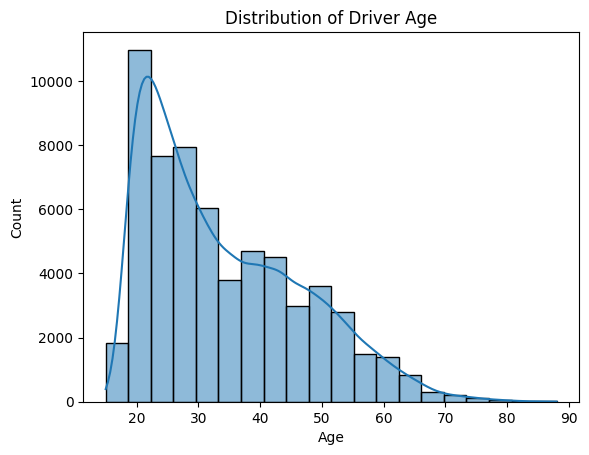

In [33]:
# Histogram of driver age
sns.histplot(data['driver_age'], bins=20, kde=True)
plt.title('Distribution of Driver Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Peak Age Range: The histogram shows a peak around the 20-30 age range, suggesting that this demographic is most frequently involved in traffic stops.

Right-Skewed Distribution: The distribution is skewed to the right, indicating that a larger proportion of drivers involved in traffic stops are younger.

Outliers: There are some outliers on the higher end of the age spectrum, suggesting that older drivers are also involved in traffic stops, albeit less frequently.

Potential Implications:

Young Driver Behavior: The high frequency of traffic stops for younger drivers might be attributed to factors such as lack of experience, speeding, or reckless driving.

Age-Related Factors: Older drivers might be more cautious and less likely to engage in risky driving behaviors, which could explain the lower frequency of stops in this age group.

# Mapping of the data and data-type casting

# 4. What is the mean stop_duration ?

In [ ]:
# mapping - we've to map new values to the column
# data-type casting - to convert data-type of one element to another
# eg: string --> float

In [16]:
# df['column_name'] = df['column_name'].map({old:new, old:new})
# df['column_name'].mean()

In [17]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [24]:
data.stop_duration.value_counts()

# to find how many unique values are present in stop_duration.
# its 4, but we take only 3.

Series([], Name: count, dtype: int64)

In [26]:
data['stop_duration'] = data['stop_duration'].map( {'0-15 Min' :7, '16-30 Min' :24, '30+ Min':45})

In [27]:
data

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,NaN,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,12/6/2012,17:54,F,1987.0,25.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
65531,12/6/2012,22:22,M,1954.0,58.0,White,Speeding,Speeding,False,NaN,Warning,False,NaN,False
65532,12/6/2012,23:20,M,1985.0,27.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,NaN,False
65533,12/7/2012,0:23,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False


In [ ]:
data['stop_duration'].mean()

In [ ]:
#11.802062660637016

# Exploratory Data Analysis

In [29]:
# df.groupby('column_1').column_2.describe()

# describe gives stats.

In [30]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,NaN,False


In [31]:
data.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


**Breakdown of the Table**

The provided data appears to be a summary of descriptive statistics for different violation types. Here's a breakdown of the columns:

violation: The type of violation (e.g., Equipment, Moving Violation, etc.)

count: The number of occurrences of this violation type


mean: The average driver age for this violation type

std: The standard deviation of driver ages for this violation type

min: The minimum driver age for this violation type

25%: The 25th percentile of driver ages

50% (median): The median driver age

75%: The 75th percentile of driver ages

max: The maximum driver age for this violation type

**Interpreting the Data:**

Equipment Violations: A relatively large number of stops (6507) were due to equipment violations. The average age of drivers involved in these stops is around 31 years old, with a standard deviation of 11.68.

Moving Violations: This category has the highest number of stops (11876) and a slightly higher average age (36.7 years old).

Other Violations: This category has the second-highest number of stops and a slightly higher average age compared to equipment violations.

Registration/Plate Violations: A smaller number of stops were due to registration/plate violations, with an average age of 32.6 years old.

Seat Belt Violations: A very small number of stops were due to seat belt violations, with an average age of 30.3 years old.